In [54]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.optim import SGD
from torch.utils.data import DataLoader, Dataset

import numpy as np

import matplotlib.pyplot as plt
import matplotlib.animation as animation

from time import time

from IPython.display import HTML


**Utility Functions**

In [41]:
def plot_tensors(x, y, *args, **kwargs):
    plt.plot(x.view(-1).tolist(), y.view(-1).tolist(), *args, **kwargs)

**1: The linear layer**

A Linear layer is an affine map between two real spaces.

Here, we construct a simple linear network that will learn to fit a linear dataset (i.e. regression)

**Data Preparation**


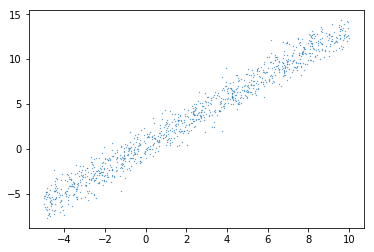

torch.Size([1000, 1]) torch.Size([1000, 1])


In [3]:
# Constants for the random data
gradient, intercept = 1.3, 0.5
minval, maxval = -5, 10
#Generate 1000 random X and the respective Y for 
x = np.random.random(1000) * (maxval - minval) + minval
y = gradient * x + intercept

# Fuzz the y value with gaussian noise
noise = np.random.normal(size=1000)
y = y + noise
plt.plot(x, y, "o", ms=0.3)
plt.show()

# Convert data to torch tensors
x = torch.Tensor(x).view(-1, 1)
y = torch.Tensor(y).view(-1, 1)

print(x.shape, y.shape)

# Test data
t_x = torch.Tensor([i/100 for i in range(-500, 1100)]).view(-1, 1)


In [4]:
# Define a simple neural network for linear regression
class LinRegNet(nn.Module):
    def __init__(self):
        super().__init__()
        # One linear layer mapping to one linear output
        self.linear = nn.Linear(1, 1)
        
    def forward(self, x):
        x = self.linear(x)
        return(x)

net = LinRegNet()
# Stochiastic Gradient Descent for 
optim = SGD(net.parameters(), lr=0.005)
criterion = nn.MSELoss()


In [5]:
epochs = 100
holder = []
for epoch in range(epochs):
    if epoch % 10 == 0:
        print(f"Processing epoch {epoch}")
    optim.zero_grad()
    r = net(x)
    loss = criterion(r, y)
    loss.backward()
    optim.step()
    holder.append((epoch + 1, net(t_x)))
    
    

Processing epoch 0
Processing epoch 10
Processing epoch 20
Processing epoch 30
Processing epoch 40
Processing epoch 50
Processing epoch 60
Processing epoch 70
Processing epoch 80
Processing epoch 90


In [6]:
t_y = net(t_x)

best_fit = t_x * gradient + intercept

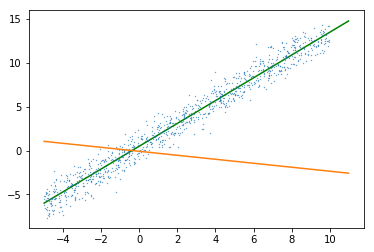

In [7]:
fig, ax = plt.subplots()
plot_tensors(t_x, best_fit, "g")
plot_tensors(x, y, "o", ms=0.3)
line, = ax.plot(t_x.view(-1).tolist(), t_y.view(-1).tolist())

# def init():

def animate(i):
    try:
        line.set_ydata(holder[i][1].tolist())
    except IndexError:
        return [line]
    return [line]
        
ani = animation.FuncAnimation(fig, animate, interval=30, blit=True);
    

In [8]:
HTML(ani.to_jshtml())

In [9]:
len(holder)

100

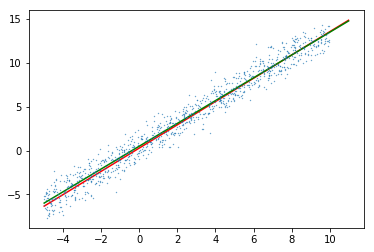

In [10]:
# plot_tensors(t_x, t_y, "r")
plot_tensors(t_x, holder[-1][1], "r")
plot_tensors(t_x, best_fit, "g")
plot_tensors(x, y, "o", ms=0.3)
plt.show()



Nonlinear Regression


In [3]:
class PointDataset(Dataset):
    def __init__(self, x, y):
        """
        @args:
            x: Input 
            y:
        """
        super().__init__()
        # No need to load from disc as we have enough ram
        self.x = x
        self.y = y
    
    def __len__(self):
        return len(self.x)
    
    def __getitem__(self, i):
#         print("getting {}".format(i))
        return ([self.x[i], self.y[i]])

In [10]:
train_data = PointDataset([i for i in range(50)], [i for i in range(50)])
for num, i  in enumerate(train_data):
    if num == 4:
        break
        
    print(i)
train_data = DataLoader(train_data, shuffle=True, batch_size=32, num_workers=0)
for num, (x, y) in enumerate(train_data):
    if num == 2:
        break
    print(x, y)
    print(x.shape, y.shape)
    

[0, 0]
[1, 1]
[2, 2]
[3, 3]
tensor([ 31,  42,  32,  43,  26,  15,  17,  24,  23,   8,  11,  44,
         39,  46,  30,  12,  10,   0,  36,  29,  18,  38,  27,  37,
         19,   6,  40,  45,  13,  33,   1,  49]) tensor([ 31,  42,  32,  43,  26,  15,  17,  24,  23,   8,  11,  44,
         39,  46,  30,  12,  10,   0,  36,  29,  18,  38,  27,  37,
         19,   6,  40,  45,  13,  33,   1,  49])
torch.Size([32]) torch.Size([32])
tensor([ 41,  16,  47,  21,   3,   7,  34,   5,  28,  48,   2,  22,
         14,   9,  20,  25,   4,  35]) tensor([ 41,  16,  47,  21,   3,   7,  34,   5,  28,  48,   2,  22,
         14,   9,  20,  25,   4,  35])
torch.Size([18]) torch.Size([18])


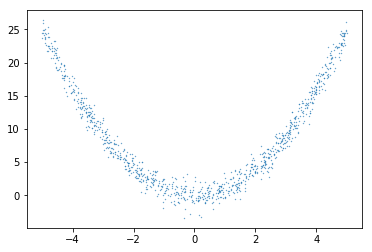

In [24]:
# Generate Training and test data
minval, maxval = -5, 5
# Generate 1000 random X and the respective Y for 
x = np.random.random(1000) * (maxval - minval) + minval
y = x ** 2

# Fuzz the y value with gaussian noise
noise = np.random.normal(size=1000)
y = y + noise

# Lets see what this looks like
plt.plot(x, y, "o", ms=0.3)
plt.show()
x, y = torch.Tensor(x), torch.Tensor(y)
train_dataset=PointDataset(x, y)
# For windows 10, do not use more than 0 workers
train_data = DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=0)

# Test data
# input data
t_x = torch.Tensor([i/100 for i in range(minval * 100, maxval * 100)]).view(-1, 1)
# Data outside the range
t_x_2 = torch.Tensor([i/100 for i in range((minval - 5) * 100, (maxval + 5) * 100)]).view(-1, 1)

# Ideal values
t_y = t_x ** 2
# Ideal values outside the range
t_y_2 = t_x_2 ** 2



In [25]:
for i in train_dataset:
    print(i)
    break
for i in train_data:
    print(i)
    break

[tensor(0.3965), tensor(0.7309)]
[tensor([ 4.4341, -3.5438, -4.1017, -3.4743,  4.4712, -3.9900, -3.5655,
         1.3663,  4.4886,  4.5980,  2.5571,  4.7614,  4.8188,  0.8903,
        -1.8577,  1.7591,  2.5457,  4.3087, -0.7812, -4.3597, -0.7366,
        -2.9015, -3.4959,  3.8173, -2.6025, -4.1690, -3.7452,  1.9996,
         3.4123, -0.3061,  0.7994, -4.4818]), tensor([ 18.1798,  10.2283,  16.4841,  12.0642,  20.6010,  15.7428,
         13.6038,   1.6607,  21.1123,  21.9423,   4.6914,  22.3450,
         22.7578,   1.6852,   3.1606,   2.4473,   4.9442,  19.5070,
         -1.0559,  18.0949,   2.7589,   7.0836,  10.4761,  14.5921,
          7.7040,  18.0430,  13.2434,   4.6043,   9.5034,   0.6071,
         -1.1229,  18.8312])]


In [26]:
class NonLinearNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(1, 40)
        self.fc2 = nn.Linear(40, 1)
        
    def forward(self, x):
        x = F.tanh(self.fc1(x))
        return self.fc2(x)
    
class NonLinearReluNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(1, 40)
        self.fc2 = nn.Linear(40, 1)
        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        return self.fc2(x)

In [90]:
# Network training helper
def train_network(train_data, lr=0.005, epochs=300,
                  network=NonLinearNet, optim=SGD, criterion=nn.MSELoss,
                  dumps=None,
                  t_x = None, dump_interval=5):
    net = network()
    optim = optim(net.parameters(), lr=0.005)
    criterion = criterion()
    for epoch in range(epochs):
        if epoch % 10 == 0:
            print("Training on epoch {}".format(epoch))
        if dumps is not None and epoch % dump_interval == 0:
            to_append = net(t_x)
            dumps.append(to_append)
        # Perform Stochiastic Minibatch Gradient descent
        for batch, (x, y) in enumerate(train_data):
            x, y = x.view(-1, 1), y.view(-1, 1)
            # Zero out previous gradients
            optim.zero_grad()
            r = net(x)
#             print(r, y)
            loss = criterion(r, y)
#             print(loss)
            loss.backward()
            optim.step()
    return net

def train_network_full_batch(train_data, lr=0.005, epochs=300,
                  network=NonLinearNet, optim=SGD, criterion=nn.MSELoss,
                  dumps=None,
                  t_x = None, dump_interval=5):
    net = network()
    optim = optim(net.parameters(), lr=0.005)
    criterion = criterion()
    for epoch in range(epochs):
        if epoch % 10 == 0: print("Training on epoch {}".format(epoch))
        if dumps and epoch % dump_interval == 0:
            to_append = net(t_x)
            dumps.append(to_append)
            
        # Perform Stochiastic Minibatch Gradient descent
        for batch, (x, y) in enumerate(train_data):
            x, y = x.view(-1, 1), y.view(-1, 1)
            # Zero out previous gradients
            optim.zero_grad()
            r = net(x)
#             print(r, y)
            loss = criterion(r, y)
#             print(loss)
            loss.backward()
        optim.step()
    return net

In [98]:
net_dumps = []
start = time()
# Minibatched
net = train_network(train_data, dumps=net_dumps, epochs=300, t_x=t_x)

Training on epoch 0
Training on epoch 10
Training on epoch 20
Training on epoch 30
Training on epoch 40
Training on epoch 50
Training on epoch 60
Training on epoch 70
Training on epoch 80
Training on epoch 90
Training on epoch 100
Training on epoch 110
Training on epoch 120
Training on epoch 130
Training on epoch 140
Training on epoch 150
Training on epoch 160
Training on epoch 170
Training on epoch 180
Training on epoch 190
Training on epoch 200
Training on epoch 210
Training on epoch 220
Training on epoch 230
Training on epoch 240
Training on epoch 250
Training on epoch 260
Training on epoch 270
Training on epoch 280
Training on epoch 290


In [66]:
train_data_batched = DataLoader(train_dataset, batch_size = len(train_dataset))
net_dumps = []
start = time()
# Minibatched
net = train_network(train_data, dumps=net_dumps, t_x=t_x)
n1 = time()
# Full batched
batch_net = train_network_full_batch(train_data_batched)
n2 = time()
# Online
unbatched_net = train_network(train_dataset)
n3 = time()
print(f"Time take: minibatch sgd: {n1 - start}, full_batch sgd: {n2 - n1}, SGD: {n3 - n2}")

Training on epoch 0
Training on epoch 10
Training on epoch 20
Training on epoch 30
Training on epoch 40
Training on epoch 50
Training on epoch 60
Training on epoch 70
Training on epoch 80
Training on epoch 90
Training on epoch 100
Training on epoch 110
Training on epoch 120
Training on epoch 130
Training on epoch 140
Training on epoch 150
Training on epoch 160
Training on epoch 170
Training on epoch 180
Training on epoch 190
Training on epoch 200
Training on epoch 210
Training on epoch 220
Training on epoch 230
Training on epoch 240
Training on epoch 250
Training on epoch 260
Training on epoch 270
Training on epoch 280
Training on epoch 290
Training on epoch 0
Training on epoch 10
Training on epoch 20
Training on epoch 30
Training on epoch 40
Training on epoch 50
Training on epoch 60
Training on epoch 70
Training on epoch 80
Training on epoch 90
Training on epoch 100
Training on epoch 110
Training on epoch 120
Training on epoch 130
Training on epoch 140
Training on epoch 150
Training o

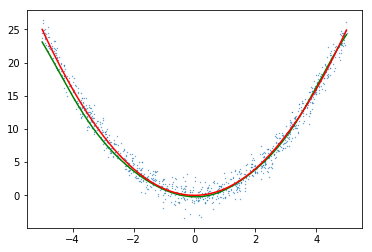

In [70]:
# Predicted fit
r_y = net(t_x)

# Points
plot_tensors(x, y, "o", ms=0.3)
#Ideal
plot_tensors(t_x, r_y, "g")
plot_tensors(t_x, t_y, "r")



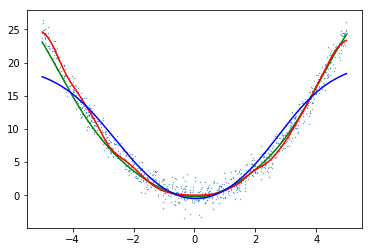

In [71]:
r_y_batch = batch_net(t_x)
r_y_online = unbatched_net(t_x)
# Comparing fit approaches
plot_tensors(x, y, "o", ms=0.3)
plot_tensors(t_x, r_y, "g")
plot_tensors(t_x, r_y_online, "r")
plot_tensors(t_x, r_y_batch, "b")

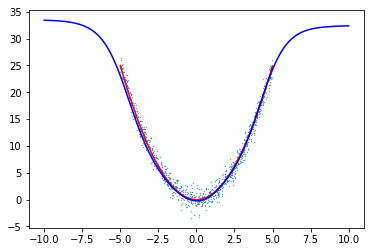

In [69]:
r_y_2 = net(t_x_2)
plot_tensors(x, y, "o", ms=0.3)
# plot_tensors(t_x, r_y, "g")
plot_tensors(t_x, t_y, "r")
plot_tensors(t_x_2, r_y_2, "b")

In [43]:
# See if performance changes with normalized x
norm_x = x - x.mean()
net2 = train_network(norm_x, y)
norm_t_x = t_x - t_x.mean()
r_x_net2 = net2(norm_t_x)

Training on epoch 0


TypeError: iteration over a 0-d tensor

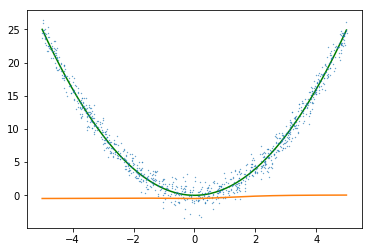

In [111]:
fig, ax = plt.subplots()
plot_tensors(t_x, t_y, "g")
plot_tensors(x, y, "o", ms=0.3)
line, = ax.plot(t_x.view(-1).tolist(), t_y.view(-1).tolist())

# def init():

def animate(line, data, i):
    try:
        line.set_ydata(data[i].view(-1).tolist())
    except IndexError:
        return [line]
    return [line]
        
ani = animation.FuncAnimation(fig, lambda x: animate(line, net_dumps, x), interval=100, blit=True);
    

In [112]:
HTML(ani.to_jshtml())